In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from datetime import datetime

# Load actors with score

In [4]:
actors = pd.read_csv('fomc_scorecard.csv', sep=";", index_col=3, header=0)

In [5]:
actors = actors[actors['Score'] != 0]
actors

,Name,Score,Shifted score
Article name,,,
Janet Yellen,"Janet L. Yellen, Chair",-1,1
Lael Brainard,Lael Brainard,-2,0
Daniel Tarullo,Daniel K. Tarullo,-2,0
William Dudley,"William C. Dudley, Vice Chairman",-1,1
James Bullard,James Bullard,1,3
Esther George,Esther L. George,2,4
Loretta Mester,Loretta J. Mester,1,3
Eric Rosengren,Eric Rosengren,-2,0
Charles Evans,Charles L. Evans,-2,0


# Load articles

In [6]:
from pymongo import MongoClient

In [7]:
client = MongoClient('localhost', 27017)
fomc_collection = client.python_import.fomc_articles_new

In [8]:
fomc_articles = pd.DataFrame(list(fomc_collection.find()))
fomc_articles.set_index('_id', inplace=True)
fomc_articles.head()

,ParticipantJobTitle,ParticipantLocation,ParticipantName,ParticipantTitleLastName,ParticipantUrl,RemarkDate,RemarkDescription,RemarkType,content,date,url
_id,,,,,,,,,,,
58c7d5593740f52798100a3c,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Dec. 03, 2013",Lacker Testifies on Bankruptcy and Financial I...,Testimony,\r Careers \r \r Conferences & Events \r Presi...,2013-12-03 00:00:00,https://www.richmondfed.org/press_room/speeche...
58c7d5593740f52798100a3d,Gov.,Board of Governors,Jerome Powell,Gov. Powell,/fomcspeak/jerome-powell,"Oct. 11, 2013 (11:00 AM ET)",Communications Challenges and Quantitative Easing,Panel Discussion,Communications Challenges and Quantitative Eas...,2013-10-11 11:00:00,https://www.federalreserve.gov/newsevents/spee...
58c7d55a3740f52798100a3e,Pres.,Federal Reserve Bank of Dallas,Richard Fisher,Pres. Fisher,/fomcspeak/pastparticipants/richard-fisher,"Aug. 22, 2013",Fed's Fisher: September Is Time to Start Taper,Video Interview,Connecting decision makers to a dynamic networ...,2013-08-22 00:00:00,https://www.bloomberg.com/news/videos/b/dfc53f...
58c7d55c3740f52798100a3f,Gov.,Board of Governors,Jerome Powell,Gov. Powell,/fomcspeak/jerome-powell,"Jul. 02, 2013 (5:45 PM ET)",International Financial Regulatory Reform,Speech,International Financial Regulatory Reform \n ...,2013-07-02 05:45:00,https://www.federalreserve.gov/newsevents/spee...
58c7d55d3740f52798100a40,Pres.,Federal Reserve Bank of Philadelphia,Charles Plosser,Pres. Plosser,/fomcspeak/pastparticipants/charles-plosser,"May. 16, 2013",Plosser: Holding MBS Not Good for Fed,Video Interview,Connecting decision makers to a dynamic networ...,2013-05-16 00:00:00,https://www.bloomberg.com/news/videos/b/8df903...


In [9]:
fomc_articles['ParticipantName'].unique()

array(['Jeffrey Lacker', 'Jerome Powell', 'Richard Fisher',
       'Charles Plosser', 'Ben Bernanke', 'Daniel Tarullo',
       'Sarah Bloom Raskin', 'Charles Evans', 'Jeremy Stein',
       'Narayana Kocherlakota', 'Dennis Lockhart', 'Eric Rosengren',
       'John Williams', 'Sandra Pianalto', 'Elizabeth Duke',
       'James Bullard', 'Janet Yellen', 'William Dudley', 'Esther George',
       'Loretta Mester', 'Stanley Fischer', 'Lael Brainard',
       'Patrick Harker', 'Robert Kaplan', 'Neel Kashkari'], dtype=object)

In [10]:
len(fomc_articles['ParticipantName'].unique())

25

In [11]:
actors.index

Index(['Janet Yellen', 'Lael Brainard', 'Daniel Tarullo', 'William Dudley',
       'James Bullard', 'Esther George', 'Loretta Mester', 'Eric Rosengren',
       'Charles Evans', 'Patrick Harker', 'Robert Kaplan', 'Jeffrey Lacker'],
      dtype='object', name='Article name')

In [12]:
len(actors.index)

12

#### There is a difference in the score sheet and the unique actors: 17 vs 25
---

# Merge articles and actors score

In [13]:
fomc_articles_scored = fomc_articles.merge(actors, left_on='ParticipantName', right_index=True)
fomc_articles_scored.head(3)

,ParticipantJobTitle,ParticipantLocation,ParticipantName,ParticipantTitleLastName,ParticipantUrl,RemarkDate,RemarkDescription,RemarkType,content,date,url,Name,Score,Shifted score
_id,,,,,,,,,,,,,,
58c7d5593740f52798100a3c,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Dec. 03, 2013",Lacker Testifies on Bankruptcy and Financial I...,Testimony,\r Careers \r \r Conferences & Events \r Presi...,2013-12-03 00:00:00,https://www.richmondfed.org/press_room/speeche...,Jeffrey M. Lacker,2,4
58c7d5693740f52798100a66,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Feb. 12, 2013 (7:30 PM ET)",Economics and the Federal Reserve After the Cr...,Speech,\r Careers \r \r Conferences & Events \r Presi...,2013-02-12 07:30:00,https://www.richmondfed.org/press_room/speeche...,Jeffrey M. Lacker,2,4
58c7d56e3740f52798100a7c,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Apr. 02, 2013 (7:30 PM ET)",Richmond Fed's Lacker and Chicago Fed's Evans ...,Panel Discussion,\r Careers \r \r Conferences & Events \r Richm...,2013-04-02 07:30:00,https://www.richmondfed.org/press_room/appeara...,Jeffrey M. Lacker,2,4


In [14]:
len(fomc_articles_scored['ParticipantName'].unique())

12

# Number of articles in each score class

In [15]:
fomc_articles_scored.groupby('Shifted score')['url'].count()

Shifted score
0    172
1    191
3    186
4     93
Name: url, dtype: int64

# Create train data and test data

In [16]:
train_data = fomc_articles_scored[fomc_articles_scored['date'] < datetime(2016, 1, 1)]
test_data = fomc_articles_scored[fomc_articles_scored['date'] >= datetime(2016, 1, 1)]

In [17]:
X_train = train_data['content']
y_train = train_data['Shifted score']
X_test = test_data['content']
y_test = test_data['Shifted score']

In [18]:
X_train.head()

_id
58c7d5593740f52798100a3c    \r Careers \r \r Conferences & Events \r Presi...
58c7d5693740f52798100a66    \r Careers \r \r Conferences & Events \r Presi...
58c7d56e3740f52798100a7c    \r Careers \r \r Conferences & Events \r Richm...
58c7d5723740f52798100a8d    \r Careers \r \r Conferences & Events \r Presi...
58c7d5733740f52798100a94    In an exclusive interview, CNBC's Steve Liesma...
Name: content, dtype: object

In [19]:
y_train.head()

_id
58c7d5593740f52798100a3c    4
58c7d5693740f52798100a66    4
58c7d56e3740f52798100a7c    4
58c7d5723740f52798100a8d    4
58c7d5733740f52798100a94    4
Name: Shifted score, dtype: int64

# Create TF matrix from CountVectorizer

In [20]:
#from sklearn.feature_extraction import text
#excludes = ['804', 'videos', 'podcasts', 'sign up', 'twitter', 'subscriptions', 'facebook', 'photos']
#stop_words = text.ENGLISH_STOP_WORDS.union(excludes)

In [72]:
vectorizer = CountVectorizer(ngram_range=(1,3), max_df=0.7, min_df=5, stop_words='english')

In [22]:
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=None, min_df=5,
        ngram_range=(1, 3), preprocessor=None,
        stop_words=frozenset({'she', 'above', 'be', 'last', 'whose', 'herein', 'one', 'thus', 'photos', 'ourselves', 'hundred', 'sincere', 'upon', 'interest', 'became', 'whatever', 'without', 'why', 'up', 'within', 'only', 'around', 'show', 'so', 'they', 'in', 'these', 'wherever', 'on', 'five', 'yours', 'th...nder', 'etc', 'sometimes', 'themselves', 'there', 'hasnt', 'twelve', 'neither', 'anywhere', 'nine'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [23]:
vectorizer.get_feature_names()

['000',
 '000 banks',
 '000 jobs',
 '000 jobs month',
 '000 mark',
 '000 month',
 '000 previous',
 '000 previous years',
 '01',
 '02',
 '0207',
 '0207 mobile',
 '0207 mobile laura',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0927',
 '0927 mobile',
 '10',
 '10 billion',
 '10 billion 50',
 '10 billion assets',
 '10 billion balance',
 '10 percent',
 '10 percent 2009',
 '10 percent october',
 '10 return',
 '10 return text',
 '10 shows',
 '10 trillion',
 '10 year',
 '10 year treasury',
 '10 years',
 '100',
 '100 000',
 '100 138',
 '100 basis',
 '100 basis points',
 '100 percent',
 '100 years',
 '100 years ago',
 '100 years federal',
 '1000',
 '1000 connecting',
 '1000 connecting decision',
 '102',
 '106',
 '11',
 '11 percent',
 '115',
 '12',
 '12 2013',
 '12 federal',
 '12 federal reserve',
 '12 million',
 '12 month',
 '12 month change',
 '12 months',
 '12 months ending',
 '12 months inflation',
 '12 percent',
 '12 regional',
 '12 regional reserve',
 '12 reserve',
 '12 reserve banks

In [24]:
len(vectorizer.get_feature_names())

19953

In [25]:
X_train_dtm = vectorizer.transform(X_train)

In [26]:
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm

<242x19953 sparse matrix of type '<class 'numpy.int64'>'
	with 185586 stored elements in Compressed Sparse Row format>

# Building a model

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [28]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
y_pred_class = nb.predict(X_test_dtm)

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [31]:
accuracy_score(y_test, y_pred_class)

0.85123966942148765

#### Confusion matrix
By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` but
predicted to be in group :math:`j`.

In [32]:
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[50,  3,  5,  5],
       [ 7, 67,  9,  3],
       [ 0,  0, 70,  1],
       [ 2,  0,  1, 19]])

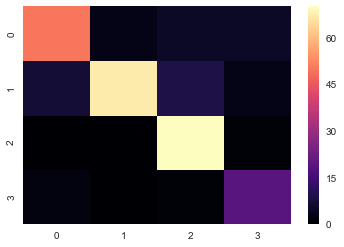

In [33]:
sns.heatmap(cm, cmap='magma')

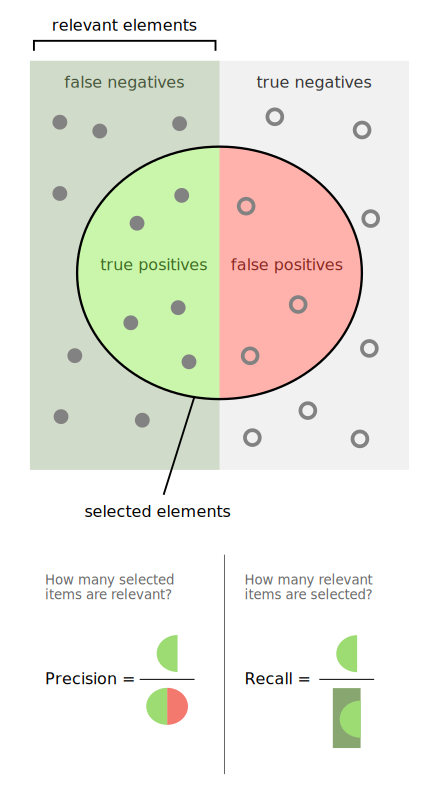

In [34]:
from IPython.display import SVG, display
def show_svg():
    display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg'))
show_svg()

In [35]:
cr = classification_report(y_test, y_pred_class)
print(cr)

             precision    recall  f1-score   support

          0       0.85      0.79      0.82        63
          1       0.96      0.78      0.86        86
          3       0.82      0.99      0.90        71
          4       0.68      0.86      0.76        22

avg / total       0.86      0.85      0.85       242



# Exploring the model

In [36]:
nb.feature_count_

array([[ 60.,   0.,  13., ...,   1.,   1.,  98.],
       [ 96.,   0.,  12., ...,   3.,   0.,   0.],
       [ 28.,   0.,  10., ...,   1.,   0.,   0.],
       [ 32.,   7.,   2., ...,   0.,   4.,   0.]])

In [37]:
dovish = nb.feature_count_[0,:]
little_dovish = nb.feature_count_[1,:]
little_hawkish = nb.feature_count_[2,:]
hawkish = nb.feature_count_[3,:]

In [38]:
X_train_tokens = vectorizer.get_feature_names()
tokens = pd.DataFrame({'dovish':dovish, 'dovish_little':little_dovish, 'hawkish_little':little_hawkish, 'hawkish':hawkish}, index=X_train_tokens)

In [92]:
tokens.sample(30, random_state=15)

,dovish,dovish_little,hawkish,hawkish_little
committee 2012 remains,7.0,0.0,0.0,0.0
residual,9.0,10.0,0.0,2.0
asset purchases forward,5.0,5.0,1.0,1.0
chicago fed president,5.0,0.0,1.0,1.0
equilibrium real rates,5.0,0.0,0.0,3.0
monetary policy decisions,9.0,8.0,0.0,13.0
2010 2013,2.0,4.0,0.0,2.0
8956 332,0.0,0.0,44.0,0.0
propose,4.0,0.0,1.0,1.0
dynamics,18.0,31.0,8.0,11.0


In [40]:
filtered_tokens = tokens[(tokens['dovish'] + tokens['dovish_little'] > 0) & (tokens['hawkish'] + tokens['hawkish_little'] > 0)]

In [41]:
filtered_tokens['hawkishness_score'] = (filtered_tokens['hawkish'] + filtered_tokens['hawkish_little'])/(filtered_tokens['dovish'] + filtered_tokens['dovish_little'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Hawkishness score ordered by descending

In [42]:
filtered_tokens.sort_values(by='hawkishness_score', ascending=False)

,dovish,dovish_little,hawkish,hawkish_little,hawkishness_score
james bullard,0.0,1.0,0.0,229.0,229.000000
bank richmond,0.0,1.0,107.0,1.0,108.000000
reserve bank richmond,0.0,1.0,107.0,1.0,108.000000
bullard,1.0,2.0,0.0,301.0,100.333333
st louis fed,1.0,1.0,0.0,165.0,82.500000
louis fed,1.0,1.0,0.0,165.0,82.500000
fred,0.0,1.0,0.0,76.0,76.000000
bullard president,0.0,1.0,0.0,76.0,76.000000
james bullard president,0.0,1.0,0.0,76.0,76.000000
convenient,0.0,1.0,2.0,74.0,76.000000


In [85]:
only_dovish = tokens[(tokens.dovish > 0) & (tokens.dovish_little == 0) & (tokens.hawkish == 0) & (tokens.hawkish_little == 0)].sort_values('dovish', ascending=False)
only_dovish_little = tokens[(tokens.dovish == 0) & (tokens.dovish_little > 0) & (tokens.hawkish == 0) & (tokens.hawkish_little == 0)].sort_values('dovish_little', ascending=False)
only_hawkish_little = tokens[(tokens.dovish == 0) & (tokens.dovish_little == 0) & (tokens.hawkish == 0) & (tokens.hawkish_little > 0)].sort_values('hawkish_little', ascending=False)
only_hawkish = tokens[(tokens.dovish == 0) & (tokens.dovish_little == 0) & (tokens.hawkish > 0) & (tokens.hawkish_little == 0)].sort_values('hawkish', ascending=False)

In [91]:
only_dovish.head(10)

,dovish,dovish_little,hawkish,hawkish_little
zlb,98.0,0.0,0.0,0.0
goal oriented,28.0,0.0,0.0,0.0
notices,28.0,0.0,0.0,0.0
5322 copyright,26.0,0.0,0.0,0.0
5322,26.0,0.0,0.0,0.0
322 5322 copyright,26.0,0.0,0.0,0.0
322 5322,26.0,0.0,0.0,0.0
322,26.0,0.0,0.0,0.0
312 322 5322,26.0,0.0,0.0,0.0
312,26.0,0.0,0.0,0.0


In [87]:
only_dovish_little.head(10)

,dovish,dovish_little,hawkish,hawkish_little
second district,0.0,97.0,0.0,0.0
working federal,0.0,96.0,0.0,0.0
reform hub,0.0,94.0,0.0,0.0
governance reform culture,0.0,94.0,0.0,0.0
culture reform hub,0.0,94.0,0.0,0.0
foster discussion corporate,0.0,94.0,0.0,0.0
foster discussion,0.0,94.0,0.0,0.0
reform culture,0.0,94.0,0.0,0.0
reform culture behavior,0.0,94.0,0.0,0.0
reform hub designed,0.0,94.0,0.0,0.0


In [88]:
only_hawkish_little.head(10)

,dovish,dovish_little,hawkish,hawkish_little
assistant president,0.0,0.0,0.0,143.0
president james,0.0,0.0,0.0,78.0
president james bullard,0.0,0.0,0.0,78.0
emailed,0.0,0.0,0.0,76.0
latest curriculum,0.0,0.0,0.0,74.0
emailed monthly,0.0,0.0,0.0,74.0
speeches research lesson,0.0,0.0,0.0,74.0
emailed monthly charge,0.0,0.0,0.0,74.0
curriculum classroom,0.0,0.0,0.0,74.0
stay date,0.0,0.0,0.0,74.0


In [89]:
only_hawkish.head(10)

,dovish,dovish_little,hawkish,hawkish_little
lacker,0.0,0.0,140.0,0.0
697,0.0,0.0,88.0,0.0
jeffrey lacker,0.0,0.0,85.0,0.0
332 0207,0.0,0.0,44.0,0.0
mobile laura,0.0,0.0,44.0,0.0
0207,0.0,0.0,44.0,0.0
bank richmond economic,0.0,0.0,44.0,0.0
fortunato 697 8196,0.0,0.0,44.0,0.0
fortunato 697,0.0,0.0,44.0,0.0
fortunato,0.0,0.0,44.0,0.0


# Logistic Regression model

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [44]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
y_pred_class = logreg.predict(X_test_dtm)

In [46]:
y_pred_prob = logreg.predict_proba(X_test_dtm)

In [47]:
y_pred_prob = y_pred_prob[:,1]

In [48]:
accuracy_score(y_test, y_pred_class)

0.83884297520661155

In [49]:
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.80      0.76      0.78        63
          1       0.87      0.76      0.81        86
          3       0.92      0.99      0.95        71
          4       0.65      0.91      0.75        22

avg / total       0.85      0.84      0.84       242



#### I's a little worse, than the Naive Baiyes model
---